# Jawablah poin-poin assignment berikut
#### perhatikan dengan baik apa yang diminta pada soal

# 1. Anda bekerja sebagai seorang data scientist, atasan anda mengirimkan anda data kepada anda dan meminta untuk memberikan analisa dengan menggunakan :
- semua metode pada proses Exploratory Data Analysis. Lakukan proses Feature Engineering terlebih dahulu dan mengecek secara teliti pada tiap kolom data sembari melakukan data understanding. **(20 Poin)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/hbb/Document/Dibimbing---DSDA/Assignment Day 16 Advanced EDA/ecommerce.csv')
df.head()
data = df.copy()

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


,InvoiceNo,Quantity,UnitPrice,CustomerID
count,4870.000000,4870.000000,4870.000000,4870.000000
mean,560586.577413,12.945791,2.937057,15291.004312
std,13211.347819,38.145988,4.744515,1709.035002
min,536365.000000,1.000000,0.040000,12347.000000
25%,548861.000000,2.000000,1.250000,13975.000000
50%,561895.000000,5.000000,1.950000,15144.000000
75%,572126.000000,12.000000,3.750000,16793.250000
max,581585.000000,992.000000,145.000000,18283.000000


Terlihat nilai dari Quantity dan UnitPrice ada outlier dengan maximal value yang jauh dari nilai mean

In [5]:
# Mengecek jumlah nilai unik di setiap kolom
for col in data.columns:
    print(f"{col}: {df[col].nunique()} unique values")

InvoiceNo: 3804 unique values
StockCode: 1773 unique values
Description: 1807 unique values
Quantity: 68 unique values
InvoiceDate: 3757 unique values
UnitPrice: 118 unique values
CustomerID: 1932 unique values
Country: 31 unique values


In [6]:
# Mengecek apakah ada nilai yang hilang (missing values)
len(data.drop_duplicates()) / len(data)

1.0

No Duplicates!

## Cek missing value

In [7]:
# Menggunakan isna
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
# Menggunakan value counts
for col in data.columns:
    print(f"=== {col} ===")
    print(data[col].value_counts())
    display()

=== InvoiceNo ===
InvoiceNo
562046    8
575491    7
576339    7
578270    7
559552    6
         ..
574560    1
547253    1
558619    1
573160    1
547413    1
Name: count, Length: 3804, dtype: int64
=== StockCode ===
StockCode
85099B    24
47566     22
22423     21
85123A    19
22197     18
          ..
22272      1
85093      1
90195A     1
23215      1
21125      1
Name: count, Length: 1773, dtype: int64
=== Description ===
Description
JUMBO BAG RED RETROSPOT               24
PARTY BUNTING                         22
REGENCY CAKESTAND 3 TIER              21
WHITE HANGING HEART T-LIGHT HOLDER    19
60 TEATIME FAIRY CAKE CASES           18
                                      ..
APPLE BATH SPONGE                      1
PAPER BUNTING COLOURED LACE            1
CANNABIS LEAF BEAD CURTAIN             1
LETTER SHAPE PENCIL SHARPENER          1
SET 6 FOOTBALL CELEBRATION CANDLES     1
Name: count, Length: 1807, dtype: int64
=== Quantity ===
Quantity
1      930
12     705
2      678
4      

No missing values

## Cek Outlier

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


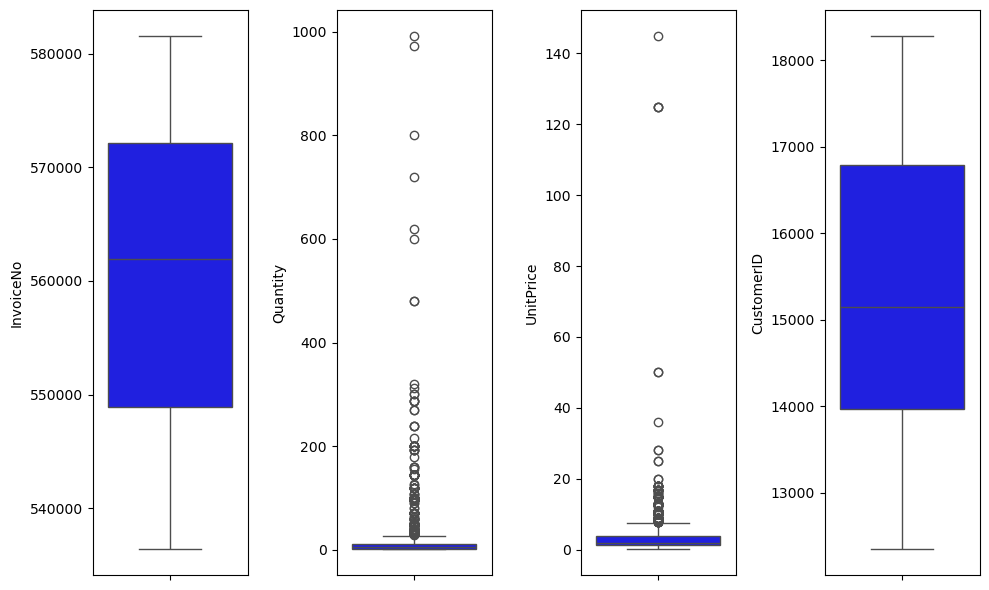

In [10]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 6))
for i in range(0, len(numerical_columns)):
    plt.subplot(1,len(numerical_columns), i+1)
    sns.boxplot(y=data[numerical_columns[i]], color='blue')
    plt.tight_layout()


Quantity, UnitPrice memiliki outlier

In [11]:
def find_outlier_boundary(df, variable):


    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [12]:
upper_boundary, lower_boundary = find_outlier_boundary(data, 'Quantity')
upper_boundary1, lower_boundary1 = find_outlier_boundary(data, 'UnitPrice')
print("Quantity")
print(f"Upper Boundary: {upper_boundary}")
print(f"Lower Boundary: {lower_boundary}")
print("\n")
print("Price")
print(f"Upper Boundary: {upper_boundary1}")
print(f"Lower Boundary: {lower_boundary1}")


Quantity
Upper Boundary: 27.0
Lower Boundary: -13.0


Price
Upper Boundary: 7.5
Lower Boundary: -2.5


In [13]:
data = data[(data['Quantity'] <= upper_boundary) & (data['Quantity'] >= lower_boundary)]
data = data[(data['UnitPrice'] <= upper_boundary1) & (data['UnitPrice'] >= lower_boundary1)]

<class 'pandas.core.frame.DataFrame'>
Index: 4144 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4144 non-null   int64  
 1   StockCode    4144 non-null   object 
 2   Description  4144 non-null   object 
 3   Quantity     4144 non-null   int64  
 4   InvoiceDate  4144 non-null   object 
 5   UnitPrice    4144 non-null   float64
 6   CustomerID   4144 non-null   int64  
 7   Country      4144 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 291.4+ KB


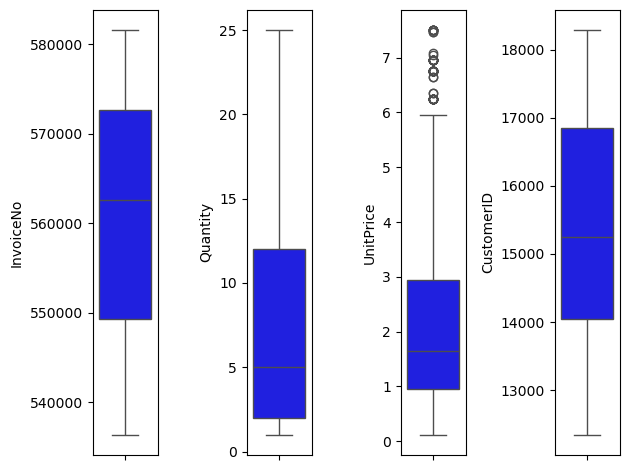

In [14]:
data.info()
for i in range(0, len(numerical_columns)):
    plt.subplot(1,len(numerical_columns), i+1)
    sns.boxplot(y=data[numerical_columns[i]], color='blue')
    plt.tight_layout()

UnitPrice sudah ada pada nilai outlier yang wajar atau masih bisa diterima.

## No Encoding
Dikarenakan kategorikal kolom hanya memiliki beberapa variasi, seperti 'Country' hanya memiliki 31 keunikan. Menurut pembuat tidak terlalu mempengaruhi proses EDA dan visualisasi, kecuali akan dilakukan proses machine learning model.

## Others

Menambah total price untuk data info tambahan untuk keperluan analisa berikutnya

In [15]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom,2.08
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom,5.10
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom,1.65
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom,15.00
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom,2.55


Datetime
Merubah date time agar mudah tracking di analisa berikutnya

In [16]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 4144 entries, 0 to 4869
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    4144 non-null   int64         
 1   StockCode    4144 non-null   object        
 2   Description  4144 non-null   object        
 3   Quantity     4144 non-null   int64         
 4   InvoiceDate  4144 non-null   datetime64[ns]
 5   UnitPrice    4144 non-null   float64       
 6   CustomerID   4144 non-null   int64         
 7   Country      4144 non-null   object        
 8   TotalPrice   4144 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 323.8+ KB


# 2. Setelah melakukan feature engineering, Ikuti anjuran berikut :
- Buat 5 pertanyaan analisa
- jawab dengan pendekatan metode data manipulation (sorting, filtering, group by, pivot, melt, crosstab, working with datetime, dsb (sesuaikan dengan keperluan anda
- Buatlah visualisasi grafik supaya mempermudah dalam ekstraksi insight setelah menjawab menggunakan metode data manipulation diatas
- Tulis insight anda

`poin` :
- insight / observation : **10 poin (1 pertanyaan 2 poin)**
- pertanyaan analisis dan jawaban metode data manipulation : **30 poin (1 pertanyaan 7 poin)**
- data visualisasi : **30 poin (1 visualisasi dari 1 pertanyaan 7 poin)**

## Key Question
1. Apa saja 5 produk dengan revenue tertinggi?
2. Negara mana yang memiliki kontribusi revenue tertinggi?
3. Trend revenue bulanan?
4. Apa distribusi dari kuantitas order?
5. Siapa saja customer dengan nilai RFM (Recency, Frequency, Monetary) tertinggi, dan bagaimana perilaku belanja mereka?

### 1. Apa saja 5 produk dengan revenue tertinggi?

In [17]:
penjualan_tertinggi = data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).reset_index().head(5)
penjualan_tertinggi

,Description,TotalPrice
0,PARTY BUNTING,648.45
1,SET OF 3 CAKE TINS PANTRY DESIGN,427.40
2,CHILLI LIGHTS,355.60
3,WHITE HANGING HEART T-LIGHT HOLDER,315.65
4,SPOTTY BUNTING,306.90


In [18]:
def barplot(df, variablex, variabley, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    for i, total in enumerate(df[variabley]):
        plt.text(i, total + (0.01 * df[variabley].max()), f"{total:,.2f}",
                ha='center', fontsize=10, color='black')
    sns.barplot(x=variablex, y=variabley, data=df, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

/var/folders/1q/y9bbyxz522bd8ynv6y9yhwx00000gn/T/ipykernel_45873/258297959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variablex, y=variabley, data=df, palette='viridis')


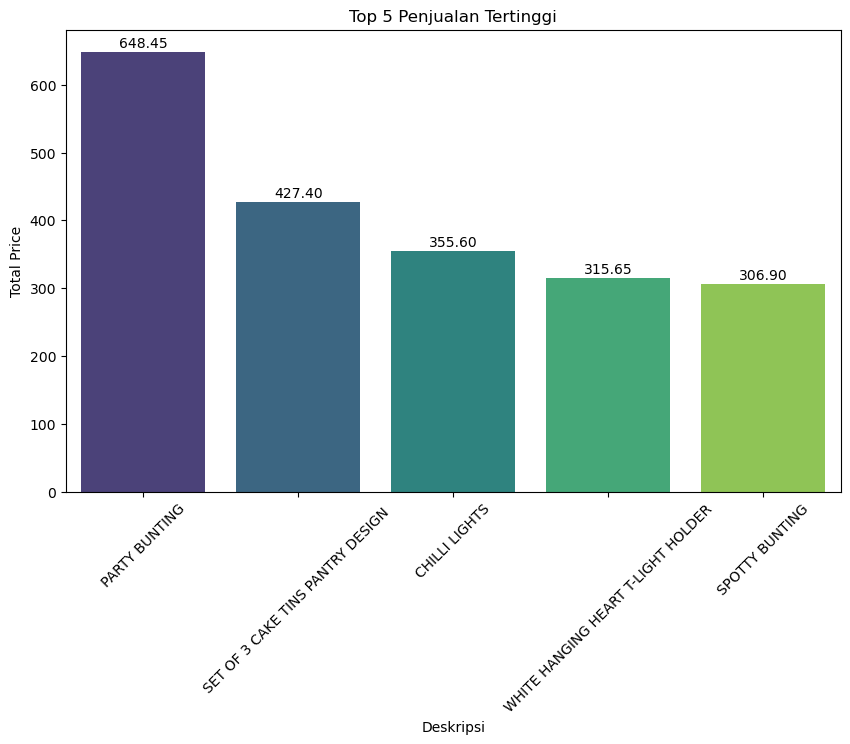

In [19]:
barplot(penjualan_tertinggi, 'Description', 'TotalPrice', 'Top 5 Penjualan Tertinggi', 'Deskripsi', 'Total Price')

In [20]:
penjualan_tertinggi['Percentage'] = (penjualan_tertinggi['TotalPrice'] / penjualan_tertinggi['TotalPrice'].sum()) * 100
penjualan_tertinggi

,Description,TotalPrice,Percentage
0,PARTY BUNTING,648.45,31.570107
1,SET OF 3 CAKE TINS PANTRY DESIGN,427.40,20.808179
2,CHILLI LIGHTS,355.60,17.312561
3,WHITE HANGING HEART T-LIGHT HOLDER,315.65,15.367575
4,SPOTTY BUNTING,306.90,14.941577


**Insight:**

Produk White Hanging Heart T-Light Holder memiliki total pendapatan tertinggi, dengan selisih sekitar 1,500 dibandingkan produk dengan pendapatan tertinggi kedua. Produk lainnya memiliki selisih pendapatan yang lebih kecil, berkisar antara 500 hingga 200. Hal ini menunjukkan bahwa White Hanging Heart T-Light Holder adalah produk yang sangat populer, menyumbang 33% dari total pendapatan.

**Rekomendasi Bisnis:**

Prioritaskan Produk Populer:
- Tingkatkan stok produk White Hanging Heart T-Light Holder untuk menghindari kekurangan yang dapat merugikan perusahaan.
- Pertimbangkan untuk menaikkan harga jual produk ini karena tingginya permintaan.

Strategi Penempatan Produk:
- Tempatkan produk ini di rak khusus atau area yang lebih terlihat untuk meningkatkan penjualan lebih lanjut.

Untuk produk dengan pendapatan lebih rendah, pertimbangkan strategi seperti:
- Mengadakan promosi atau diskon.
- Memberikan harga spesial.
- Menempatkan produk di lokasi strategis untuk menarik perhatian pelanggan.

### 2. Negara mana yang memiliki kontribusi revenue tertinggi?

In [21]:
negara_tertinggi = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index().head(5)
negara_tertinggi

,Country,TotalPrice
0,United Kingdom,44913.89
1,Germany,2020.86
2,EIRE,1391.48
3,France,1093.79
4,Switzerland,586.40


/var/folders/1q/y9bbyxz522bd8ynv6y9yhwx00000gn/T/ipykernel_45873/258297959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variablex, y=variabley, data=df, palette='viridis')


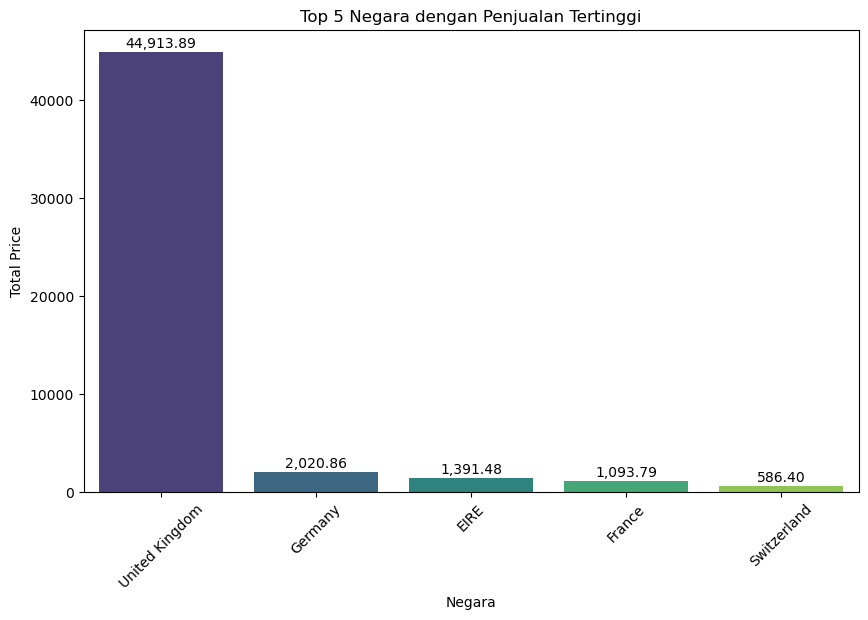

In [22]:
barplot(negara_tertinggi, 'Country', 'TotalPrice', 'Top 5 Negara dengan Penjualan Tertinggi', 'Negara', 'Total Price')

**Insight:**

Negara dengan kontribusi revenue tertinggi adalah **United Kingdom** dengan total revenue sebesar 93,011.36. Angka ini jauh lebih tinggi dibandingkan negara lainnya seperti Netherlands (3,622.33), Germany (3,363.77), Ireland (3,156.78), dan France (2,320.55). United Kingdom menyumbang mayoritas revenue, menunjukkan bahwa pasar utama perusahaan berada di negara ini.

**Rekomendasi:**

**Fokus pada Pasar Utama (United Kingdom):**

- Karena United Kingdom adalah pasar utama, perusahaan dapat meningkatkan strategi pemasaran di negara ini untuk mempertahankan dan meningkatkan revenue. Misalnya, dengan memberikan diskon khusus, program member, atau kampanye.
- Perusahaan juga dapat meningkatkan stok barang di gudang lokal untuk memastikan ketersediaan produk dan mengurangi waktu pengiriman.

**Ekspansi ke Pasar Lain:**

- Negara-negara seperti Netherlands, Germany, Ireland, dan France memiliki kontribusi revenue yang lebih kecil. Perusahaan dapat melakukan analisis lebih lanjut untuk memahami kebutuhan pasar di negara-negara ini dan meningkatkan penjualan. Misalnya, dengan menyesuaikan produk atau harga sesuai preferensi lokal.
- Ketergantungan yang tinggi pada satu negara (United Kingdom) dapat menjadi risiko jika terjadi perubahan ekonomi atau regulasi di negara tersebut. Oleh karena itu, perusahaan perlu mengembangkan pasar dengan meningkatkan penjualan di negara-negara lain.

Dengan strategi ini, perusahaan dapat memaksimalkan potensi pasar di United Kingdom sekaligus meningkatkan kontribusi revenue dari negara-negara lain.

### 3. Trend revenue bulanan?

In [23]:
trend_bulanan = data.groupby(data['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum().reset_index()
trend_bulanan

,InvoiceDate,TotalPrice
0,2010-12,3575.40
1,2011-01,2856.98
2,2011-02,2855.76
3,2011-03,3716.25
4,2011-04,3234.35
5,2011-05,4120.26
6,2011-06,3068.65
7,2011-07,4018.98
8,2011-08,3778.73
9,2011-09,5282.78


/var/folders/1q/y9bbyxz522bd8ynv6y9yhwx00000gn/T/ipykernel_45873/258297959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variablex, y=variabley, data=df, palette='viridis')


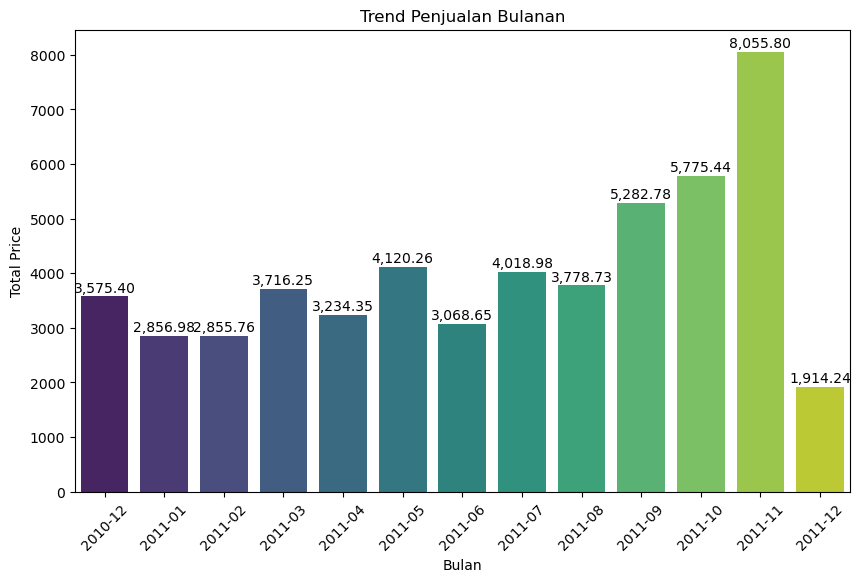

In [24]:
barplot(trend_bulanan, 'InvoiceDate', 'TotalPrice', 'Trend Penjualan Bulanan', 'Bulan', 'Total Price')

In [25]:
trend_bulanan['InvoiceDate'] = trend_bulanan['InvoiceDate'].dt.to_timestamp()

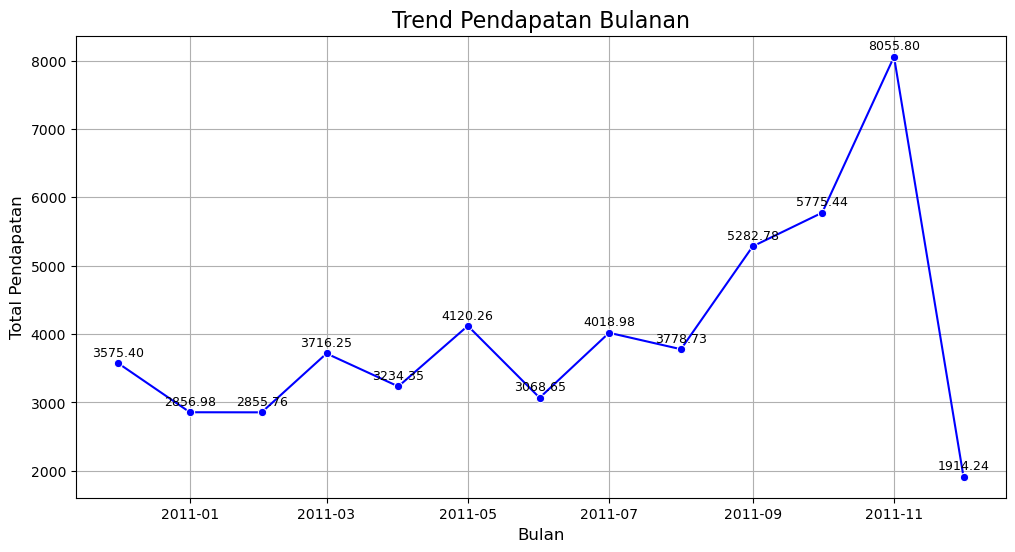

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_bulanan, x='InvoiceDate', y='TotalPrice', marker='o', color='blue')
for i, row in trend_bulanan.iterrows():
    plt.annotate(f"{row['TotalPrice']:.2f}", 
                 (row['InvoiceDate'], row['TotalPrice']), 
                 textcoords="offset points", 
                 xytext=(0, 5),  # Offset the text slightly above the marker
                 ha='center', fontsize=9)
plt.title('Trend Pendapatan Bulanan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Pendapatan', fontsize=12)
plt.grid(True)
plt.show()

**Insight:**

1. Dari grafik trend pendapatan bulanan, terlihat bahwa pendapatan cenderung fluktuatif sepanjang tahun.
2. Pendapatan tertinggi terjadi pada bulan November 2011 dengan total pendapatan sebesar 17,948.84, yang kemungkinan besar disebabkan oleh peningkatan aktivitas belanja menjelang musim liburan.
3. Pendapatan terendah terjadi pada bulan Februari 2011 dengan total pendapatan sebesar 6,152.46, yang mungkin disebabkan oleh rendahnya aktivitas belanja setelah musim liburan.

**Rekomendasi Bisnis:**

1. **Strategi Musim Liburan:**
    - Fokuskan kampanye pemasaran dan promosi pada bulan Oktober dan November untuk memanfaatkan peningkatan aktivitas belanja menjelang musim liburan.
    - Tambahkan stok produk populer untuk mengantisipasi lonjakan permintaan selama periode ini.

2. **Strategi untuk Bulan dengan Pendapatan Rendah:**
    - Lakukan promosi khusus atau diskon pada bulan-bulan dengan pendapatan rendah seperti Januari dan Februari untuk mendorong penjualan.
    - Pertimbangkan untuk meluncurkan produk baru atau kampanye pemasaran kreatif untuk menarik perhatian pelanggan selama periode ini.

3. **Analisis Lebih Lanjut:**
    - Lakukan analisis mendalam untuk memahami faktor-faktor yang memengaruhi fluktuasi pendapatan bulanan, seperti tren musiman, perilaku pelanggan, atau promosi yang dilakukan.
    - Gunakan data ini untuk merancang strategi yang lebih efektif dalam meningkatkan pendapatan sepanjang tahun.

Dengan strategi ini, perusahaan dapat memaksimalkan pendapatan selama musim puncak dan mengurangi dampak dari periode dengan pendapatan rendah.

### 4. Apa distribusi dari kuantitas order?

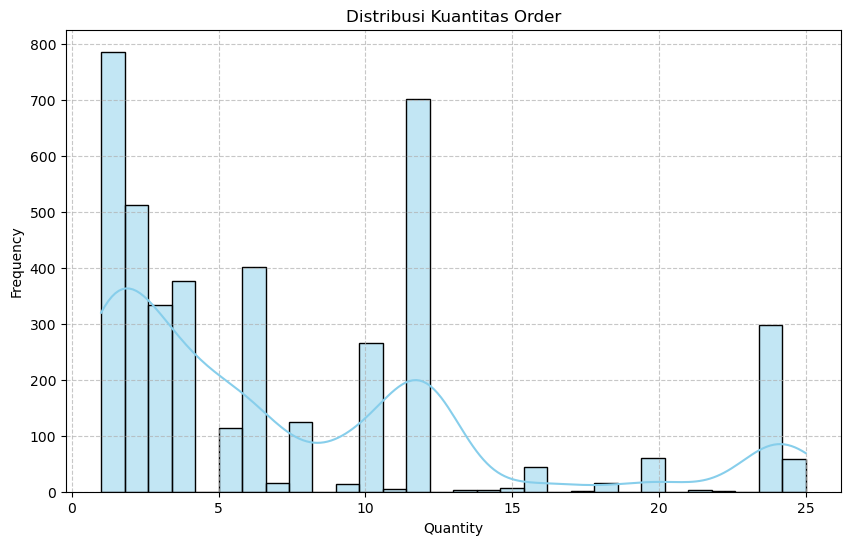

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Quantity'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Kuantitas Order')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Kesimpulan Distribusi Kuantitas Order:**

Dari visualisasi distribusi kuantitas order, mayoritas transaksi memiliki jumlah pembelian (Quantity) yang rendah, umumnya antara 1 hingga 5 unit per transaksi. Distribusi bersifat right-skewed, artinya sebagian besar pelanggan membeli dalam jumlah kecil, sementara pembelian dalam jumlah besar sangat jarang terjadi.

**Insight:**
- Sebagian besar pelanggan melakukan pembelian dalam jumlah kecil, menunjukkan perilaku belanja ritel (end-user) bukan grosir.
- Outlier pada kuantitas order kemungkinan berasal dari pembelian khusus, promosi, atau pelanggan bisnis.

**Rekomendasi Bisnis:**
- Fokus pada strategi pemasaran untuk pembelian kecil, seperti bundling produk, diskon pembelian kedua, atau loyalty program untuk meningkatkan frekuensi pembelian.
- Analisis lebih lanjut terhadap transaksi dengan kuantitas besar untuk mengidentifikasi peluang kerjasama B2B atau program khusus pelanggan grosir.
- Pastikan stok produk populer selalu tersedia untuk memenuhi permintaan pembelian kecil yang konsisten.

### 5. Siapa saja customer dengan nilai RFM (Recency, Frequency, Monetary) tertinggi, dan bagaimana perilaku belanja mereka?

In [31]:
# Menghitung nilai RFM untuk setiap customer

ref_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
ref_date

Timestamp('2011-12-10 12:31:00')

In [32]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  
    'InvoiceNo': 'nunique',                              
    'TotalPrice': 'sum'                                  
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [34]:
top_recency = rfm.sort_values('Recency').head(5) 
top_frequency = rfm.sort_values('Frequency', ascending=False).head(5)
top_monetary = rfm.sort_values('Monetary', ascending=False).head(5)

print("Top 5 Customer dengan Recency terbaik (paling baru belanja):")
print(top_recency)
print("\nTop 5 Customer dengan Frequency tertinggi:")
print(top_frequency)
print("\nTop 5 Customer dengan Monetary tertinggi:")
print(top_monetary)

Top 5 Customer dengan Recency terbaik (paling baru belanja):
      CustomerID  Recency  Frequency  Monetary
1191       16401        1          3     59.70
32         12433        1          5    122.76
1562       17644        1          3     63.40
282        13269        1          5    115.70
1522       17530        1          3     31.60

Top 5 Customer dengan Frequency tertinggi:
      CustomerID  Recency  Frequency  Monetary
1628       17841        2         60    578.22
751        14911        1         51   1268.91
139        12748        1         44    358.31
665        14606        3         36    198.65
870        15311        3         19    187.29

Top 5 Customer dengan Monetary tertinggi:
      CustomerID  Recency  Frequency  Monetary
751        14911        1         51   1268.91
1628       17841        2         60    578.22
218        13089        4         19    506.00
497        14096        4         14    432.14
559        14298       53          8    359.62


/var/folders/1q/y9bbyxz522bd8ynv6y9yhwx00000gn/T/ipykernel_45873/3732602986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='Monetary', data=top_monetary, palette='mako')


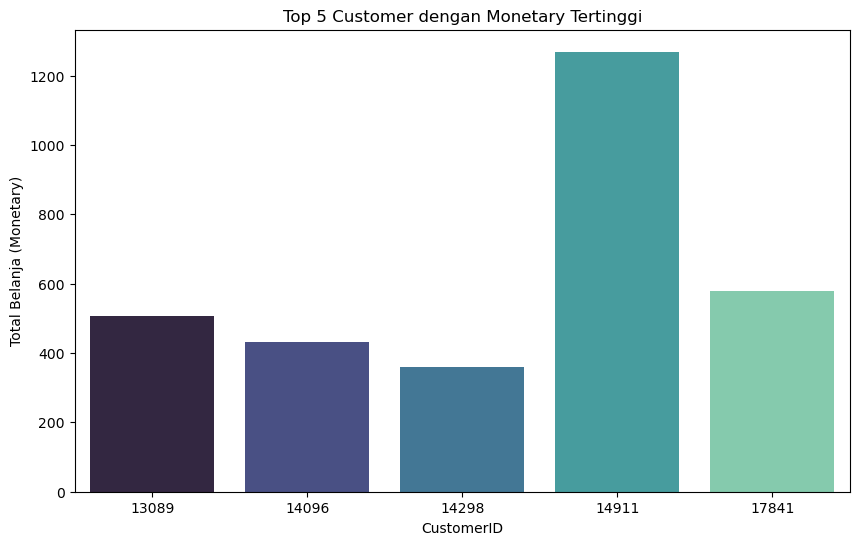

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='Monetary', data=top_monetary, palette='mako')
plt.title('Top 5 Customer dengan Monetary Tertinggi')
plt.xlabel('CustomerID')
plt.ylabel('Total Belanja (Monetary)')
plt.show()

**Insight:**

- Customer dengan nilai Recency terendah (paling baru berbelanja) cenderung masih aktif dan berpotensi untuk ditingkatkan loyalitasnya.
- Customer dengan Frequency tertinggi adalah pelanggan yang sering melakukan transaksi, menandakan loyalitas dan engagement yang tinggi.
- Customer dengan Monetary tertinggi adalah pelanggan yang memberikan kontribusi revenue terbesar bagi bisnis.

**Rekomendasi Bisnis:**
1. Customer dengan Recency Terbaik:
    Lakukan pendekatan personal seperti email ucapan terima kasih, penawaran khusus, atau loyalty program untuk menjaga engagement mereka.
2. Customer dengan Frequency Tinggi:
    Berikan reward atau program eksklusif (misal: membership, diskon khusus) untuk meningkatkan retensi dan mendorong pembelian lebih sering.
3. Customer dengan Monetary Tinggi:
    Identifikasi kebutuhan mereka dan tawarkan produk premium, bundling, atau layanan after-sales untuk meningkatkan nilai transaksi.
4. Strategi Umum:  
    Segmentasikan pelanggan berdasarkan skor RFM untuk menjalankan kampanye pemasaran yang lebih terarah dan efektif, sehingga dapat meningkatkan lifetime value pelanggan dan memaksimalkan revenue bisnis.

## 3. Lakukan analisis multivariate pada kolom numerikal berupa :
- Correlation Heatmap + insight / observation **(10 poin)**

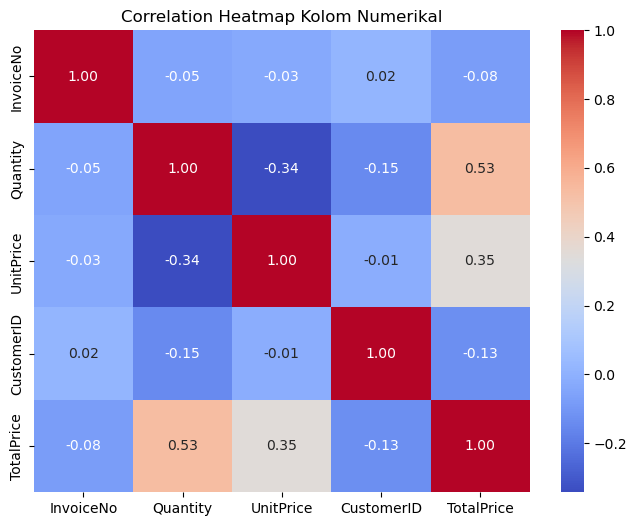

In [38]:
# Correlation Heatmap untuk kolom numerikal
plt.figure(figsize=(8, 6))
corr = data[['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID', 'TotalPrice']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Kolom Numerikal')
plt.show()

**Kesimpulan Analisis Multivariate (Correlation Heatmap):**

Berdasarkan correlation heatmap pada kolom numerikal:

- Terdapat korelasi positif yang cukup kuat antara `Quantity` dan `TotalPrice` (0.53), yang berarti semakin banyak jumlah barang yang dibeli, semakin besar nilai transaksi.
- `UnitPrice` juga memiliki korelasi positif dengan `TotalPrice` (0.35), menandakan harga satuan produk turut mempengaruhi nilai transaksi, meskipun tidak sekuat pengaruh kuantitas.
- Korelasi antara `Quantity` dan `UnitPrice` bersifat negatif (-0.34), mengindikasikan bahwa pembelian dalam jumlah besar cenderung terjadi pada produk dengan harga satuan lebih rendah.
- Korelasi antara `CustomerID` dengan variabel lain relatif lemah, menunjukkan tidak ada hubungan linier yang signifikan antara ID pelanggan dengan variabel numerik lainnya.
- Korelasi antar variabel lain seperti `InvoiceNo` dengan variabel lain juga sangat rendah, sehingga tidak memberikan insight berarti.

**Insight:**  
Faktor utama yang mempengaruhi total transaksi adalah jumlah barang yang dibeli dan harga satuan produk. Strategi bisnis dapat difokuskan pada peningkatan volume pembelian dan penawaran produk dengan harga satuan yang optimal untuk memaksimalkan pendapatan.

## 4. Tuliskan kesimpulan dari Case Study EDA tersebut

- **Data sudah rapi:** Tidak ada duplikasi atau data kosong, dan outlier sudah dibersihkan. Kolom tambahan seperti `TotalPrice` juga sudah siap untuk analisa.
- **Produk favorit dan negara utama:** Hanya segelintir produk yang benar-benar laris, dan mayoritas pembeli berasal dari United Kingdom. Jadi, pasar utama sudah jelas.
- **Pola belanja pelanggan:** Kebanyakan orang belanja dalam jumlah kecil, tapi ada juga pelanggan “setia” yang sering dan banyak belanja.
- **Tren penjualan:** Pendapatan naik turun tiap bulan, dengan lonjakan di akhir tahun (momen liburan). Waktu-waktu ini cocok sekali buat promo atau stok ekstra.
- **Faktor penentu transaksi:** Semakin banyak barang dibeli, makin besar nilai transaksinya. Biasanya, pembelian besar terjadi untuk produk dengan harga satuan lebih murah.

**Intinya:**  
EDA ini membantu kita memahami siapa pelanggan utama, produk apa yang paling laku, dan kapan waktu terbaik untuk jualan. Dengan insight ini, bisnis bisa lebih fokus, strategi pemasaran lebih tepat, dan peluang untuk tumbuh jadi lebih besar.
